In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns
from matplotlib import pyplot as plt
from nlp import LemmaTokenizer
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_dev = pd.read_csv("dataset/development.csv", index_col="ids", infer_datetime_format=True, parse_dates=[2])
df_eval = pd.read_csv("dataset/evaluation.csv", infer_datetime_format=True, parse_dates=[1])
df_dev.drop(columns=["flag", "user"], inplace=True)
df_eval.drop(columns=["flag", "user"], inplace=True)
df_dev.drop_duplicates(keep='first' ,inplace=True)
# rimozione tweet duplicati con sentiment diverso
c = df_dev.index.value_counts()
c = c[c > 1]
indexes_to_remove = c.index.values
df_dev.drop(labels=indexes_to_remove, inplace=True)

/home/mveronesi/.conda/envs/dslab/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [4]:
dates_dev = df_dev["date"]
dates_eval = df_eval["date"]

In [5]:
print(dates_dev.apply(lambda x: x.year).value_counts())
print(dates_eval.apply(lambda x: x.year).value_counts())
# all samples in df_dev and df_eval are collected in year 2009

2009    224414
Name: date, dtype: int64
2009    74999
Name: date, dtype: int64


<BarContainer object of 3 artists>

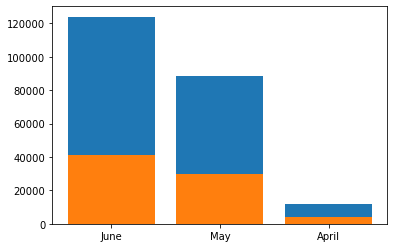

In [6]:
months_dev = dates_dev.apply(lambda x: x.month_name()).value_counts()
plt.bar(months_dev.index.values, months_dev.values)
months_eval = dates_eval.apply(lambda x: x.month_name()).value_counts()
plt.bar(months_eval.index.values, months_eval.values)

<BarContainer object of 24 artists>

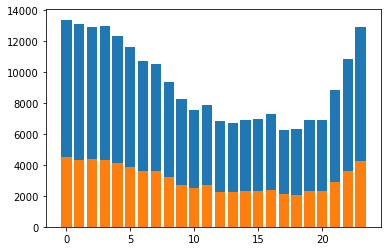

In [7]:
# hours distribution
hours_dev = dates_dev.apply(lambda x: x.hour).value_counts()
plt.bar(hours_dev.index.values, hours_dev.values)
hours_eval = dates_eval.apply(lambda x: x.hour).value_counts()
plt.bar(hours_eval.index.values, hours_eval.values)

<BarContainer object of 7 artists>

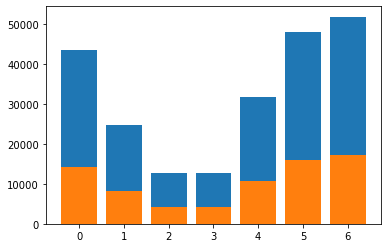

In [8]:
# day of the week distribution
weekday_dev = dates_dev.apply(lambda x: x.weekday()).value_counts()
plt.bar(weekday_dev.index.values, weekday_dev.values)
weekday_eval = dates_eval.apply(lambda x: x.weekday()).value_counts()
plt.bar(weekday_eval.index.values, weekday_eval.values)

In [9]:
df_dev["month"] = df_dev["date"].apply(lambda x: x.month_name())
df_dev["weekday"] = df_dev["date"].apply(lambda x: x.weekday())
df_dev["hour"] = df_dev["date"].apply(lambda x: x.hour)

In [10]:
df_dev = pd.get_dummies(df_dev, columns=["month", "weekday", "hour"]).drop(columns=["date"])